In [14]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("C:/Users/Admin/Desktop/Crop_Production_Prediction_Project/data/processed/final_crop_dataset.csv")

print("✅ Data loaded successfully!")
print(df.shape)
df.head()


✅ Data loaded successfully!
(2385, 12)


,Crop,Year,Production,State,Cost_A2_FL,Cost_C2,Cost_Prod_C2,Yield,Variety,Season_Duration,Recommended_Zone,Index
0,Total Foodgrains,2006,158.8,NaN,0.0,0.00,0.00,0.00,NaN,NaN,NaN,0.0
1,Rice,2006,200.8,NaN,0.0,0.00,0.00,0.00,NaN,NaN,NaN,99.0
2,Wheat,2006,131.6,Madhya Pradesh,12464.4,22489.75,810.25,23.59,MPO(JW) 1215 (MPO 1215),120,"Madhya Pradesh, Chhattisgarh, Gujarat and Raja...",112.0
3,Wheat,2006,131.6,Madhya Pradesh,12464.4,22489.75,810.25,23.59,MACS 6222,108,"Maharashtra, Karnataka, Andhra Pradesh and Tam...",112.0
4,Wheat,2006,131.6,Madhya Pradesh,12464.4,22489.75,810.25,23.59,PDW 314,169,"Punjab, Haryana, Western Uttar Pradesh, Delhi,...",112.0


In [15]:
df.shape
df.info()
df.describe(include='all')
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              2385 non-null   object 
 1   Year              2385 non-null   int64  
 2   Production        2385 non-null   float64
 3   State             1560 non-null   object 
 4   Cost_A2_FL        2385 non-null   float64
 5   Cost_C2           2385 non-null   float64
 6   Cost_Prod_C2      2385 non-null   float64
 7   Yield             2385 non-null   float64
 8   Variety           1560 non-null   object 
 9   Season_Duration   915 non-null    object 
 10  Recommended_Zone  1560 non-null   object 
 11  Index             2385 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 223.7+ KB


Index(['Crop', 'Year', 'Production', 'State', 'Cost_A2_FL', 'Cost_C2',
       'Cost_Prod_C2', 'Yield', 'Variety', 'Season_Duration',
       'Recommended_Zone', 'Index'],
      dtype='object')

In [9]:
print(df.isnull().sum())
print(df.duplicated().sum())

Crop                   0
Year                   0
Production             0
State                825
Cost_A2_FL             0
Cost_C2                0
Cost_Prod_C2           0
Yield                  0
Variety              825
Season_Duration     1470
Recommended_Zone     825
Index                  0
dtype: int64
0


In [16]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [17]:
for col in ['Crop', 'Variety', 'State', 'Season', 'Recommended Zone']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

In [18]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 2 to 2383
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              810 non-null    object 
 1   Year              810 non-null    int64  
 2   Production        810 non-null    float64
 3   State             810 non-null    object 
 4   Cost_A2_FL        810 non-null    float64
 5   Cost_C2           810 non-null    float64
 6   Cost_Prod_C2      810 non-null    float64
 7   Yield             810 non-null    float64
 8   Variety           810 non-null    object 
 9   Season_Duration   810 non-null    object 
 10  Recommended_Zone  810 non-null    object 
 11  Index             810 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 82.3+ KB


Crop                0
Year                0
Production          0
State               0
Cost_A2_FL          0
Cost_C2             0
Cost_Prod_C2        0
Yield               0
Variety             0
Season_Duration     0
Recommended_Zone    0
Index               0
dtype: int64

In [19]:
X = df[['Cost_A2_FL', 'Cost_C2', 'Cost_Prod_C2', 'Yield', 'Index', 'Year']]
y = df['Production']

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['State', 'Variety', 'Recommended_Zone']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

In [21]:
X = df[['Cost_A2_FL', 'Cost_C2', 'Cost_Prod_C2', 'Yield', 'Index', 'Year', 'State', 'Variety']]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data:", X_train.shape, "Testing data:", X_test.shape)

Training data: (648, 8) Testing data: (162, 8)


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model training complete!")

✅ Model training complete!


In [24]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # ✅ Manually take square root

print("R² Score:", round(r2, 3))
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))

R² Score: 0.364
MAE: 24.77
RMSE: 32.24


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Decision Tree R²:", r2_score(y_test, dt.predict(X_test)))
print("Random Forest R²:", r2_score(y_test, rf.predict(X_test)))

Decision Tree R²: -0.052684013916355577
Random Forest R²: 0.15082558731867357


In [29]:
import joblib

joblib.dump(rf, "C:/Users/Admin/Desktop/Crop_Production_Prediction_Project/models/crop_model.pkl")

print("✅ Model saved successfully!")

✅ Model saved successfully!


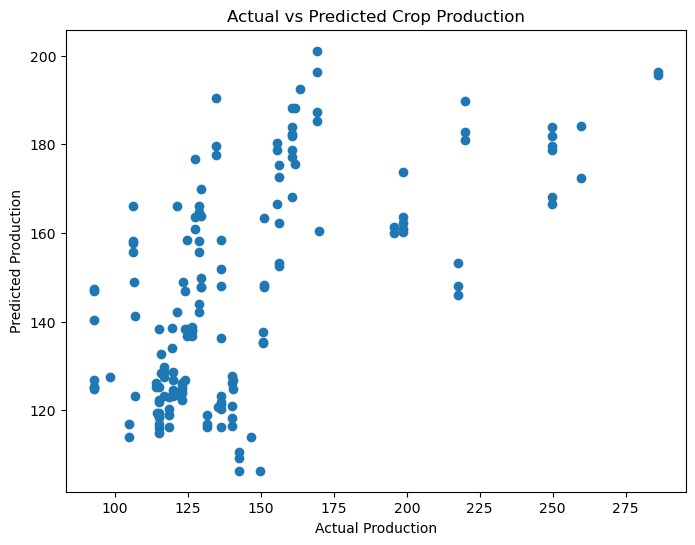

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Crop Production")
plt.show()

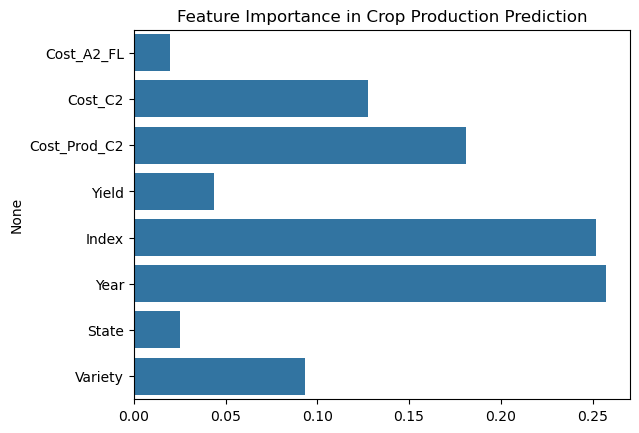

In [31]:
import seaborn as sns
import numpy as np

importances = rf.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance in Crop Production Prediction")
plt.show()

In [32]:
with open("C:/Users/Admin/Desktop/Crop_Production_Prediction_Project/outputs/metrics.txt", "w") as f:
    f.write(f"R² Score: {r2:.3f}\n")
    f.write(f"MAE: {mae:.2f}\n")
    f.write(f"RMSE: {rmse:.2f}\n")

print("✅ Metrics saved successfully!")

✅ Metrics saved successfully!
